In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder , LabelEncoder,StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score , classification_report
from sklearn.model_selection import train_test_split , GridSearchCV ,cross_val_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import sklearn.metrics 
from collections import Counter
from imblearn.over_sampling import SMOTE
print(sklearn.metrics.get_scorer_names())
sns.set(rc={'figure.figsize':(5,5)})
pd.options.display.max_columns = None

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [38]:
train = pd.read_csv("C:\\Users\\Mega-PC\\Desktop\\projects\\Financial inclusion in africa zindi competition\\Train.csv")
test_final = pd.read_csv("C:\\Users\\Mega-PC\\Desktop\\projects\\Financial inclusion in africa zindi competition\\Test.csv")
train.drop(["uniqueid"] , axis = 1 , inplace= True) #placed here so don't rerun every time
uniqueid_col =test_final["uniqueid"]
country_col =test_final["country"]
test_final.drop(["uniqueid"] , axis = 1 , inplace= True) #placed here so don't rerun every time
train.head()
test_final.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [39]:
train.describe()
test_final.describe(include="all")

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,10086,10086.000000,10086,10086,10086.000000,10086.000000,10086,10086,10086,10086,10086
unique,4,NaN,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,3745,NaN,6189,7559,NaN,NaN,5847,5487,4663,5479,2773
mean,NaN,2016.975907,NaN,NaN,3.778802,38.308348,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847356,NaN,NaN,2.212721,16.270053,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,5.000000,48.000000,NaN,NaN,NaN,NaN,NaN


In [40]:
train.describe(exclude=["int64","float64"])
test_final.describe(exclude=["int64","float64"])


,country,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,10086,10086,10086,10086,10086,10086,10086,10086
unique,4,2,2,2,6,5,6,10
top,Rwanda,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,3745,6189,7559,5847,5487,4663,5479,2773


In [41]:
train.isnull().sum()
test_final.isnull().sum()

country                   0
year                      0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [42]:
print(train.shape)
test_final.shape

(23524, 12)


(10086, 11)

In [43]:
test_final.duplicated().any()

True

In [44]:
train.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [45]:
"""ord_encoder = OrdinalEncoder()
OH_encoder = OneHotEncoder(sparse = False)
ord_cols =["location_type","cellphone_access","gender_of_respondent"]
OH_cols = ["country","gender_of_respondent","relationship_with_head","marital_status","education_level","job_type"]
preprocessor = ColumnTransformer(transformers=[
    ("ord" , ord_encoder , ord_cols),
    ("onehot" , OH_encoder , OH_cols)
])
preprocessor"""

'ord_encoder = OrdinalEncoder()\nOH_encoder = OneHotEncoder(sparse = False)\nord_cols =["location_type","cellphone_access","gender_of_respondent"]\nOH_cols = ["country","gender_of_respondent","relationship_with_head","marital_status","education_level","job_type"]\npreprocessor = ColumnTransformer(transformers=[\n    ("ord" , ord_encoder , ord_cols),\n    ("onehot" , OH_encoder , OH_cols)\n])\npreprocessor'

# --------------------------------- EDA ----------------------------------------

In [46]:
train_profile = ProfileReport(train, title="Pandas Profiling Report of train dataset")
test_profile = ProfileReport(test_final, title="Pandas Profiling Report of test dataset")

In [47]:
#train_profile

In [48]:
#test_profile

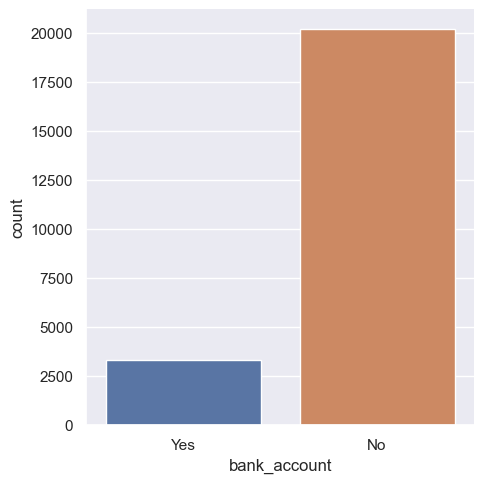

In [49]:
sns.catplot(x="bank_account", kind="count", data=train)
plt.show()

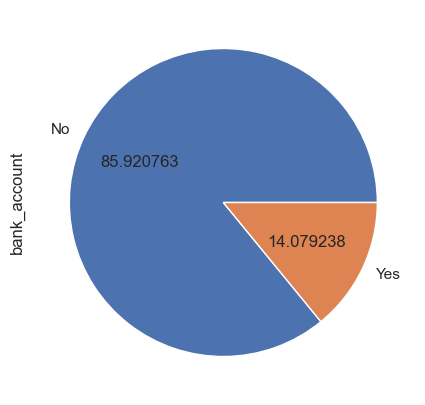

In [50]:
sns.set(rc={'figure.figsize':(5,5)})
train['bank_account'].value_counts().plot.pie(autopct = '%2f')
plt.show()

# ------------------------------ Modeling -------------------------------------

In [51]:
le = LabelEncoder()
OH_encoder = OneHotEncoder(sparse=False)


le_cols = ["location_type" , "cellphone_access" , "gender_of_respondent"]
OH_cols = ["country" , "relationship_with_head" , "marital_status" ,"education_level" , "job_type" ,"year"]


for i in ["location_type" , "cellphone_access" , "gender_of_respondent" ]:
    train[i] = le.fit_transform(train[i])
    test_final[i] = le.transform(test_final[i])
    
train["bank_account"] = le.fit_transform(train["bank_account"])


oh_encoded_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[OH_cols]))
oh_encoded_cols_test = pd.DataFrame(OH_encoder.fit_transform(test_final[OH_cols]))

oh_encoded_cols_train.index = train.index
oh_encoded_cols_test.index = test_final.index


oh_encoded_cols_train.columns = OH_encoder.get_feature_names_out()
oh_encoded_cols_test.columns = OH_encoder.get_feature_names_out()


train.drop(OH_cols , axis = 1 , inplace = True)
test_final.drop(OH_cols , axis = 1 , inplace = True)


train = pd.concat([train , oh_encoded_cols_train] , axis = 1)
test_final = pd.concat([test_final , oh_encoded_cols_test] , axis = 1)

print("there are {} features".format(len(train.columns)))
print("there are {} features".format(len(test_final.columns)))
print(train.head())
test_final.head()

there are 40 features
there are 39 features
   bank_account  location_type  cellphone_access  household_size  \
0             1              0                 1               3   
1             0              0                 0               5   
2             1              1                 1               5   
3             0              0                 1               5   
4             0              1                 0               8   

   age_of_respondent  gender_of_respondent  country_Kenya  country_Rwanda  \
0                 24                     0            1.0             0.0   
1                 70                     0            1.0             0.0   
2                 26                     1            1.0             0.0   
3                 34                     0            1.0             0.0   
4                 26                     1            1.0             0.0   

   country_Tanzania  country_Uganda  relationship_with_head_Child  \
0              

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year_2016,year_2017,year_2018
0,1,1,3,30,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,7,51,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,3,77,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0,6,39,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,0,3,16,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### here we must standarize the numerical data before using the PCA

In [52]:
numerical_cols = ["age_of_respondent" , "household_size"]
ss = StandardScaler()
matrix_train = train[numerical_cols].to_numpy(copy=True)
matrix_test = test_final[numerical_cols].to_numpy(copy = True)

matrix_train = ss.fit_transform(matrix_train)
matrix_test = ss.transform(matrix_test)

print("train" , matrix_train)
print("test" , matrix_test)
print(ss.get_params())

#now we append the results back to the train df

train.drop(numerical_cols , axis= 1 ,inplace = True)
test_final.drop(numerical_cols , axis= 1 ,inplace = True)

mdf_train = pd.DataFrame(matrix_train ,index = train.index , columns=["age_of_respondent" , "household_size"])
mdf_test = pd.DataFrame(matrix_test ,index = test_final.index , columns=["age_of_respondent" , "household_size"])

train = pd.concat([train , mdf_train ] , axis = 1)
test_final = pd.concat([test_final ,mdf_test ] , axis = 1)

print(train[numerical_cols])
test_final[numerical_cols]

train [[-0.89618796 -0.35800673]
 [ 1.88827897  0.53983446]
 [-0.77512418  0.53983446]
 ...
 [-0.71459229  0.53983446]
 [-0.53299662  1.43767565]
 [-1.13831551  2.78443744]]
test [[-0.53299662 -0.35800673]
 [ 0.73817307  1.43767565]
 [ 2.3120022  -0.35800673]
 ...
 [ 0.01179039 -1.25584792]
 [-0.6540604   0.98875506]
 [-1.38044307  1.43767565]]
{'copy': True, 'with_mean': True, 'with_std': True}
       age_of_respondent  household_size
0              -0.896188       -0.358007
1               1.888279        0.539834
2              -0.775124        0.539834
3              -0.290869        0.539834
4              -0.775124        1.886596
...                  ...             ...
23519           0.556577        0.090914
23520          -0.714592       -0.806927
23521          -0.714592        0.539834
23522          -0.532997        1.437676
23523          -1.138316        2.784437

[23524 rows x 2 columns]


,age_of_respondent,household_size
0,-0.532997,-0.358007
1,0.738173,1.437676
2,2.312002,-0.358007
3,0.011790,0.988755
4,-1.380443,-0.358007
...,...,...
10081,1.404024,-0.806927
10082,0.193386,1.886596
10083,0.011790,-1.255848
10084,-0.654060,0.988755


In [53]:
print(train.head())
test_final.head()

   bank_account  location_type  cellphone_access  gender_of_respondent  \
0             1              0                 1                     0   
1             0              0                 0                     0   
2             1              1                 1                     1   
3             0              0                 1                     0   
4             0              1                 0                     1   

   country_Kenya  country_Rwanda  country_Tanzania  country_Uganda  \
0            1.0             0.0               0.0             0.0   
1            1.0             0.0               0.0             0.0   
2            1.0             0.0               0.0             0.0   
3            1.0             0.0               0.0             0.0   
4            1.0             0.0               0.0             0.0   

   relationship_with_head_Child  relationship_with_head_Head of Household  \
0                           0.0                          

,location_type,cellphone_access,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year_2016,year_2017,year_2018,age_of_respondent,household_size
0,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.532997,-0.358007
1,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.738173,1.437676
2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.312002,-0.358007
3,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.011790,0.988755
4,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.380443,-0.358007


In [54]:
y = train.bank_account
train.drop(["bank_account"] , axis = 1 , inplace = True)

In [55]:
pca = PCA(0.95)
train_pca = pca.fit_transform(train)
test_pca = pca.transform(test_final)

a=pca.explained_variance_ratio_
print(-np.sort(-a))
print(len(a))
print(sum(a))

[0.20834124 0.17490348 0.10131273 0.07808768 0.06612074 0.05545441
 0.03988656 0.03579711 0.03075997 0.02658426 0.02446463 0.02325112
 0.02029846 0.01634162 0.01578209 0.0148147  0.01001579 0.0091792 ]
18
0.9513957784069361


the yes is only 14% , model won't figure the pattern for yes (under_fitting yes) // thus we will make an oversampling and under_sampling using Synthetic Minority Oversampling Technique and see later which one performs best.
Also ,before proceeding any further we will check what are the best params for the SMOTE function.

In [56]:
train = train_pca

# oversampling

In [57]:
# under_sampling will be done later
# handling the inbalanced data (finding best params first)
def k_neighbors():
    to_best = make_pipeline(SMOTE() , XGBClassifier())
    gsc= GridSearchCV(to_best , {"smote__k_neighbors" :range(5,10,1)} , scoring ="f1" ,cv = 5)
    gs_results = gsc.fit(train , y)
    print("best params are %s" %gs_results.best_params_)
    return gs_results.best_params_['smote__k_neighbors']

#best params are {'smote__k_neighbors': 5}

loop to find best ration since gridsearch wont help this time

In [58]:
def sampling_strat():
    weights = np.linspace(0.3 , 1 , 8)
    i_list= []
    f1_list =[]
    for i in weights : 
        to_best = make_pipeline(SMOTE(sampling_strategy= i) , XGBClassifier())
        to_best.fit(train , y)
        f1= cross_val_score(to_best, train, y,cv=5,scoring='f1')
        i_list.append(i)
        f1_list.append(f1.mean())
    scores_df =pd.DataFrame({"i" : i_list , "f1_score" : f1_list})
    df=scores_df.sort_values("f1_score" , ascending=False).copy()
    df.reset_index()
    return df.i[0]


#     i  f1_score
#0  0.3  0.390657
#7  1.0  0.392506
#2  0.5  0.394670
#6  0.9  0.395976
#3  0.6  0.401456
#1  0.4  0.403011
#5  0.8  0.406627
#4  0.7  0.411773


we are set we can accept the best params for the SMOTE to be sampling_strategy = 0.9 and k_neighbors = 5

SMOTE(sampling_strategy = 0.9 , k_neighbors = 5)

In [59]:
smote_over = SMOTE(sampling_strategy=sampling_strat() , k_neighbors=k_neighbors())
train_smote , test_smote =smote_over.fit_resample(train , y)
print('original dataset shape', Counter(y))
print('resample dataset shape', Counter(test_smote))

best params are {'smote__k_neighbors': 8}
original dataset shape Counter({0: 20212, 1: 3312})
resample dataset shape Counter({0: 20212, 1: 6063})


In [60]:

def modeling(model):
    model.fit(train_smote, test_smote)
    preds = model.predict(train_smote)
    dict={"Confusion matrix :  {} , \n accuracy : {} \n f1_score : {} " .format(confusion_matrix(test_smote , preds) ,accuracy_score(test_smote , preds) ,f1_score(test_smote , preds))}
    return dict
    

In [66]:
def best_param_model(model) : 
    gsc = GridSearchCV(model ,{"model__n_estimators" : range(100,1000,200) , "model_max_depth"  : range (2,8,1)},scoring = "f1" , cv = 5)
    gs_results = gsc.fit(train_smote,test_smote)
    print("best params for the' model are %s" %gs_results.best_params_)
    return gs_results.best_params_

In [67]:
"""
modelXGB = XGBClassifier()
modelRF= RandomForestClassifier() 
df=pd.DataFrame()
for i in [modelXGB,modelRF]:
    s=modeling(i)
    df=df.append(s , ignore_index=True)
print(df)
"""
modelXGB = XGBClassifier()
params = best_param_model(modelXGB)
modelXGB = XGBClassifier(n_estimators = params["model__n_estimators"] , max_depth =params["model_max_depth"]  , learning_rate = 0.1)
s=modeling(modelXGB)
print(s)
#this was made mistakenly before the PCA
#                Confusion matrix  accuracy  f1_score
#0  [[17578, 2634], [5066, 9082]]  0.775902  0.702289
#1  [[19661, 551], [1809, 12339]]  0.931315  0.912715
#2   [[20040, 172], [371, 13777]]  0.984197  0.980674 <-- random forest classifier
#3    [[20176, 36], [507, 13641]]  0.984197  0.980485

#and this is after the PCA
#                 Confusion matrix  accuracy  f1_score
#0  [[16581, 3631], [4935, 13255]]  0.776939  0.755787
#1  [[18061, 2151], [1432, 16758]]  0.906698  0.903421
#2    [[19960, 252], [299, 17891]]  0.985652  0.984835 <--random forest classifier
#3     [[20153, 59], [492, 17698]]  0.985652  0.984672



[18:48:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "model__n_estimators", "model_max_depth" } are not used.

[18:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "model__n_estimators", "model_max_depth" } are not used.

[18:48:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "model__n_estimators", "model_max_depth" } are not used.

[18:48:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "model__n_estimators", "model_max_depth" } are not used.

[18:48:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-

In [ ]:
test_final["bank_account"] = modelXGB.predict(test_pca)
to_submit=pd.DataFrame({"uniqueid": uniqueid_col + " x " + country_col,"bank_account": test_final.bank_account})
to_submit.to_csv("18_submission_rightback.csv" , index = False)


# undersampling

In [ ]:
"""####under_sampling########


# under_sampling will be done later
# handling the inbalanced data
from collections import Counter
from imblearn.under_sampling import AllKNN


to_best = make_pipeline(AllKNN(), XGBClassifier())
gsc= GridSearchCV(to_best , {"allknn__n_neighbors": range(5,10,1)} , scoring ="f1" ,cv = 5) #, "allknn__sampling_strategy": np.linspace(0.3 , 1 , 8)
gs_results = gsc.fit(train , test)
print("best params are %s" %gs_results.best_params_)

####under_sampling########

#best params are {'allknn__n_neighbors': 5}"""

'####under_sampling########\n\n\n# under_sampling will be done later\n# handling the inbalanced data\nfrom collections import Counter\nfrom imblearn.under_sampling import AllKNN\n\n\nto_best = make_pipeline(AllKNN(), XGBClassifier())\ngsc= GridSearchCV(to_best , {"allknn__n_neighbors": range(5,10,1)} , scoring ="f1" ,cv = 5) #, "allknn__sampling_strategy": np.linspace(0.3 , 1 , 8)\ngs_results = gsc.fit(train , test)\nprint("best params are %s" %gs_results.best_params_)\n\n####under_sampling########\n\n#best params are {\'allknn__n_neighbors\': 5}'

In [ ]:
"""####undersampling########

from collections import Counter
from imblearn.under_sampling import AllKNN
smote_over = AllKNN(n_neighbors=5)
train_smote , test_smote =smote_over.fit_resample(train , test)
print('original dataset shape', Counter(test))
print('resample dataset shape', Counter(test_smote))

####undersampling########
#original dataset shape Counter({0: 20212, 1: 3312})
#resample dataset shape Counter({0: 12814, 1: 3312})"""

"####undersampling########\n\nfrom collections import Counter\nfrom imblearn.under_sampling import AllKNN\nsmote_over = AllKNN(n_neighbors=5)\ntrain_smote , test_smote =smote_over.fit_resample(train , test)\nprint('original dataset shape', Counter(test))\nprint('resample dataset shape', Counter(test_smote))\n\n####undersampling########\n#original dataset shape Counter({0: 20212, 1: 3312})\n#resample dataset shape Counter({0: 12814, 1: 3312})"

In [ ]:
"""####undersampling########

def modeling(model):
    f1 = cross_val_score(model , train , test , cv= 10 ,scoring = "f1"  )
    print("for model {} the f1_value is {}".format(model , f1.mean())) 
    return 

####undersampling########"""

'####undersampling########\n\ndef modeling(model):\n    f1 = cross_val_score(model , train , test , cv= 10 ,scoring = "f1"  )\n    print("for model {} the f1_value is {}".format(model , f1.mean())) \n    return \n\n####undersampling########'

In [ ]:
"""####undersampling########

modelLR=LogisticRegressionCV()
modelXGB = XGBClassifier()
modelRF= RandomForestClassifier()
modelDT = DecisionTreeClassifier() 
df=pd.DataFrame()
for i in [modelLR,modelXGB,modelRF,modelDT]:
    s=modeling(i)
    df=df.append(s , ignore_index=True)
print(df)

#               Confusion matrix  accuracy  f1_score
#0  [[12699, 115], [1532, 1780]]  0.897867  0.683695
#1     [[12812, 2], [157, 3155]]  0.990140  0.975421
#2      [[12814, 0], [58, 3254]]  0.996403  0.991167 <-- random forest
#3      [[12814, 0], [58, 3254]]  0.996403  0.991167

####undersampling########"""

'####undersampling########\n\nmodelLR=LogisticRegressionCV()\nmodelXGB = XGBClassifier()\nmodelRF= RandomForestClassifier()\nmodelDT = DecisionTreeClassifier() \ndf=pd.DataFrame()\nfor i in [modelLR,modelXGB,modelRF,modelDT]:\n    s=modeling(i)\n    df=df.append(s , ignore_index=True)\nprint(df)\n\n#               Confusion matrix  accuracy  f1_score\n#0  [[12699, 115], [1532, 1780]]  0.897867  0.683695\n#1     [[12812, 2], [157, 3155]]  0.990140  0.975421\n#2      [[12814, 0], [58, 3254]]  0.996403  0.991167 <-- random forest\n#3      [[12814, 0], [58, 3254]]  0.996403  0.991167\n\n####undersampling########'